## Keras -- MLPs on MNIST

In [0]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

Using TensorFlow backend.


In [0]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [0]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [0]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
# https://keras.io/getting-started/sequential-model-guide/

# The Sequential model is a linear stack of layers.
# you can create a Sequential model by passing a list of layer instances to the constructor:

# model = Sequential([
#     Dense(32, input_shape=(784,)),
#     Activation('relu'),
#     Dense(10),
#     Activation('softmax'),
# ])

# You can also simply add layers via the .add() method:

# model = Sequential()
# model.add(Dense(32, input_dim=784))
# model.add(Activation('relu'))

###

# https://keras.io/layers/core/

# keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', 
# bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
# kernel_constraint=None, bias_constraint=None)

# Dense implements the operation: output = activation(dot(input, kernel) + bias) where
# activation is the element-wise activation function passed as the activation argument, 
# kernel is a weights matrix created by the layer, and 
# bias is a bias vector created by the layer (only applicable if use_bias is True).

# output = activation(dot(input, kernel) + bias)  => y = activation(WT. X + b)

####

# https://keras.io/activations/

# Activations can either be used through an Activation layer, or through the activation argument supported by all forward layers:

# from keras.layers import Activation, Dense

# model.add(Dense(64))
# model.add(Activation('tanh'))

# This is equivalent to:
# model.add(Dense(64, activation='tanh'))

# there are many activation functions ar available ex: tanh, relu, softmax


from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras import initializers

In [0]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

<h2> MLP + ReLU + ADAM + BN + Dropout </h2>

In [0]:
%matplotlib inline

In [0]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

In [0]:
models = {}
histories = {}

In [0]:
nb_epoch=20

import warnings
warnings.filterwarnings('ignore')

model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=initializers.he_normal(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(128, activation='relu', kernel_initializer=initializers.he_normal(seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=2, validation_data=(X_test, Y_test))

models['748-512-128-10'] = model_relu
histories['748-512-128-10'] = history

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 8s - loss: 0.4254 - acc: 0.8715 - val_loss: 0.1421 - val_acc: 0.9559
Epoch 2/20
 - 5s - loss: 0.2042 - acc: 0.9391 - val_loss: 0.1042 - val_acc: 0.9669
Epoch 3/20
 - 5s - loss: 0.1655 - acc: 0.9500 - val_loss: 0.0909 - val_acc: 0.9707
Epoch 4/20
 - 5s - loss: 0.1397 - acc: 0.9584 - val_loss: 0.0823 - val_acc: 0.9741
Epoch 5/20
 - 5s - loss: 0.1207 - acc: 0.9627 - val_loss: 0.0785 - val_acc: 0.9763
Epoch 6/20
 - 5s - loss: 0.1094 - acc: 0.9666 - val_loss: 0.0717 - val_acc: 0.9773
Epoch 7/20
 - 5s - loss: 0.1004 - acc: 0.9690 - val_loss: 0.0725 - val_acc: 0.9778
Epoch 8/20
 - 5s - loss: 0.0913 - acc: 0.9720 - val_loss: 0.0658 - val_acc: 0.9787
Epoch 9/20
 - 5s - loss: 0.0861 - acc: 0.9733 - val_loss: 0.0627 - val_acc: 0.9804
Epoch 10/20
 - 5s - loss: 0.0822 - acc: 0.9743 - val_loss: 0.0653 - val_acc: 0.9790
Epoch 11/20
 - 5s - loss: 0.0794 - acc: 0.9756 - val_loss: 0.0605 - val_acc: 0.9817
Epoch 12/20
 - 5s - loss: 0.0736 - 

Test score: 0.05295374449652736
Test accuracy: 0.9851


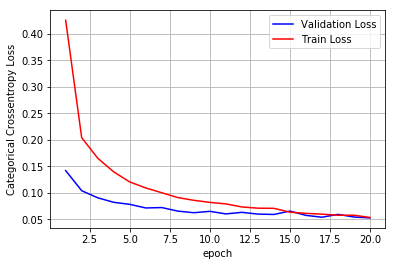

In [0]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [69]:
w_after = model_relu.get_weights()
print(type(w_after))
print(len(w_after))
for w_i in w_after:
  print(w_i.shape)

<class 'list'>
14
(784, 512)
(512,)
(512,)
(512,)
(512,)
(512,)
(512, 128)
(128,)
(128,)
(128,)
(128,)
(128,)
(128, 10)
(10,)


**w_after is of length 14:**
- indices 0, 1 => hidden_layer 1
- indices 2, 3 => BN 1
- indices 4, 5 => Dropout 1
- indices 6, 7 => Hidden layer 2
- indices 8, 9 => BN 2
- indices 10, 11 => Dropout 2
- indices 12, 13 => Output layer

**So taking 0, 6, 12 indices as our main weights to plot**

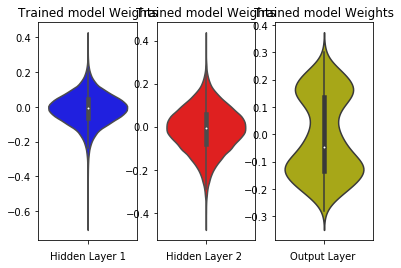

In [70]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[6].flatten().reshape(-1,1)
out_w = w_after[12].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**The above model is best model with the architecture 784-512-128-10 (which is used in video lectures). The model uses BatchNormalisation and Dropout with Relu activation function and Adam optimizer. The model gives loss of 0.05295 and accuracy of 98.51 % which is pretty good.**

**Weight distributions are compared before hyper-parameter tuning where we discuss the differences between all the models.**

### Model with 2 hidden layers. Architecture: 784-256-128-10

In [0]:
import warnings
warnings.filterwarnings('ignore')

temp_model = Sequential()
temp_model.add(Dense(256, activation='relu', input_shape=(input_dim,), kernel_initializer=initializers.he_normal(seed=None)))
temp_model.add(BatchNormalization())
temp_model.add(Dropout(0.5))
temp_model.add(Dense(128, activation='relu', kernel_initializer=initializers.he_normal(seed=None)))
temp_model.add(BatchNormalization())
temp_model.add(Dropout(0.5))
temp_model.add(Dense(output_dim, activation='softmax'))

temp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

temp_history = temp_model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

models['784-256-128-10'] = temp_model
histories['784-256-128-10'] = temp_history

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.5272 - acc: 0.8391 - val_loss: 0.1871 - val_acc: 0.9414
Epoch 2/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.2536 - acc: 0.9245 - val_loss: 0.1246 - val_acc: 0.9612
Epoch 3/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.2031 - acc: 0.9390 - val_loss: 0.1122 - val_acc: 0.9652
Epoch 4/20
60000/60000 [==============================] - 5s 80us/step - loss: 0.1721 - acc: 0.9481 - val_loss: 0.0949 - val_acc: 0.9696
Epoch 5/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.1554 - acc: 0.9525 - val_loss: 0.0873 - val_acc: 0.9734
Epoch 6/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.1382 - acc: 0.9588 - val_loss: 0.0858 - val_acc: 0.9739
Epoch 7/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.1301 - acc: 0.9600 - val_loss: 0.0798 - val_acc

Test score: 0.06300898878761219
Test accuracy: 0.9811


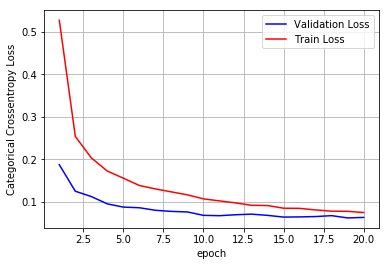

In [0]:
score = temp_model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,nb_epoch+1))

vy = temp_history.history['val_loss']
ty = temp_history.history['loss']
plt_dynamic(x, vy, ty, ax)

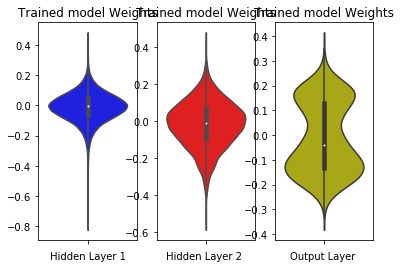

In [71]:
w_after = models['784-256-128-10'].get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[6].flatten().reshape(-1,1)
out_w = w_after[12].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**This model gives more loss and less accuracy when compared to previous model. So let us increase the nodes in both hidden layers which may increase our accuracy.**

### Model with 2 hidden layers. Architecture: 784-512-256-10

In [0]:
import warnings
warnings.filterwarnings('ignore')

model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=initializers.he_normal(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(256, activation='relu', kernel_initializer=initializers.he_normal(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

models['784-512-256-10'] = model_relu
histories['784-512-256-10'] = history

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 110us/step - loss: 0.4092 - acc: 0.8761 - val_loss: 0.1306 - val_acc: 0.9593
Epoch 2/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.1895 - acc: 0.9418 - val_loss: 0.0981 - val_acc: 0.9697
Epoch 3/20
60000/60000 [==============================] - 5s 86us/step - loss: 0.1506 - acc: 0.9537 - val_loss: 0.0834 - val_acc: 0.9735
Epoch 4/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.1254 - acc: 0.9609 - val_loss: 0.0765 - val_acc: 0.9766
Epoch 5/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.1128 - acc: 0.9642 - val_loss: 0.0737 - val_acc: 0.9776
Epoch 6/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.1021 - acc: 0.9677 - val_loss: 0.0698 - val_acc: 0.9789
Epoch 7/20
60000/60000 [==============================] - 5s 90us/step - loss: 0.0929 - acc: 0.9709 - val_loss: 0.0669 - val_ac

Test score: 0.053256970743143756
Test accuracy: 0.9844


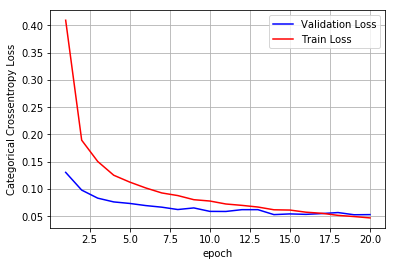

In [0]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

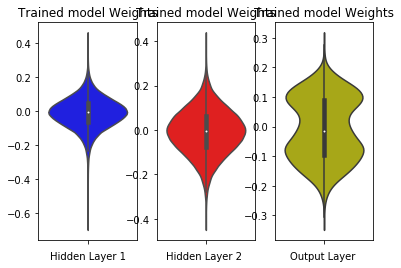

In [72]:
w_after = models['784-512-256-10'].get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[6].flatten().reshape(-1,1)
out_w = w_after[12].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**This model gives slightly less accuracy than the previous architecture. Let us increase the hidden layers to 3 and see the results for any improvement.**

### Model with 3 hidden layers. Architecture: 784-512-256-128-10

In [0]:
import warnings
warnings.filterwarnings('ignore')

model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=initializers.he_normal(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(256, activation='relu', kernel_initializer=initializers.he_normal(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(128, activation='relu', kernel_initializer=initializers.he_normal(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

models['784-512-256-128-10'] = model_relu
histories['784-512-256-128-10'] = history

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 134us/step - loss: 0.5687 - acc: 0.8276 - val_loss: 0.1627 - val_acc: 0.9482
Epoch 2/20
60000/60000 [==============================] - 7s 109us/step - loss: 0.2471 - acc: 0.9259 - val_loss: 0.1212 - val_acc: 0.9634
Epoch 3/20
60000/60000 [==============================] - 7s 109us/step - loss: 0.1956 - acc: 0.9423 - val_loss: 0.1008 - val_acc: 0.9707
Epoch 4/20
60000/60000 [==============================] - 6s 108us/step - loss: 0.1634 - acc: 0.9515 - val_loss: 0.0931 - val_acc: 0.9707
Epoch 5/20
60000/60000 [==============================] - 6s 105us/step - loss: 0.1472 - acc: 0.9561 - val_loss: 0.0825 - val_acc: 0.9739
Epoch 6/20
60000/60000 [==============================] - 7s 109us/step - loss: 0.1313 - acc: 0.9615 - val_loss: 0.0875 - val_acc: 0.9728
Epoch 7/20
60000/60000 [==============================] - 6s 107us/step - loss: 0.1188 - acc: 0.9645 - val_loss: 0.0733 - 

Test score: 0.06344375926086214
Test accuracy: 0.9826


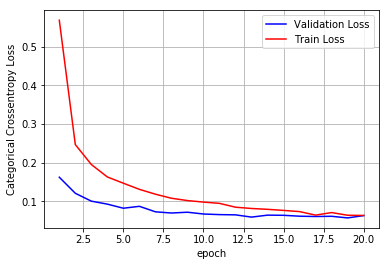

In [0]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

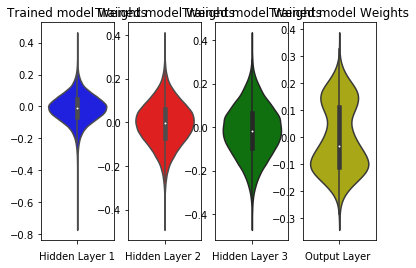

In [73]:
w_after = models['784-512-256-128-10'].get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[6].flatten().reshape(-1,1)
h3_w = w_after[12].flatten().reshape(-1,1)
out_w = w_after[18].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**Having 3 hidden layers decreased our accuracy a lot. Let us see a model with 5 hidden layers and finally choose best architecture to work further and increase the accuracy by increasing epochs**

### Model with 5 hidden layers. Architecture: 784-512-128-64-32-16-10

In [0]:
import warnings
warnings.filterwarnings('ignore')

model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=initializers.he_normal(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(128, activation='relu', kernel_initializer=initializers.he_normal(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(64, activation='relu', kernel_initializer=initializers.he_normal(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(32, activation='relu', kernel_initializer=initializers.he_normal(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(16, activation='relu', kernel_initializer=initializers.he_normal(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

models['784-512-128-64-32-16-10'] = model_relu
histories['784-512-128-64-32-16-10'] = history

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 189us/step - loss: 1.8746 - acc: 0.3506 - val_loss: 0.8461 - val_acc: 0.7740
Epoch 2/20
60000/60000 [==============================] - 9s 149us/step - loss: 1.1108 - acc: 0.6165 - val_loss: 0.4079 - val_acc: 0.8689
Epoch 3/20
60000/60000 [==============================] - 9s 152us/step - loss: 0.7822 - acc: 0.7377 - val_loss: 0.2863 - val_acc: 0.9303
Epoch 4/20
60000/60000 [==============================] - 9s 150us/step - loss: 0.6412 - acc: 0.7962 - val_loss: 0.2044 - val_acc: 0.9531
Epoch 5/20
60000/60000 [==============================] - 9s 151us/step - loss: 0.5363 - acc: 0.8406 - val_loss: 0.1763 - val_acc: 0.9566
Epoch 6/20
60000/60000 [==============================] - 9s 152us/step - loss: 0.4789 - acc: 0.8615 - val_loss: 0.1462 - val_acc: 0.9638
Epoch 7/20
60000/60000 [==============================] - 9s 154us/step - loss: 0.4361 - acc: 0.8782 - val_loss: 0.1300 -

Test score: 0.10397892101514153
Test accuracy: 0.9783


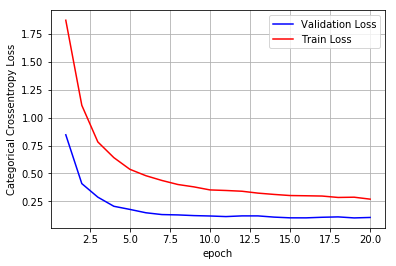

In [0]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

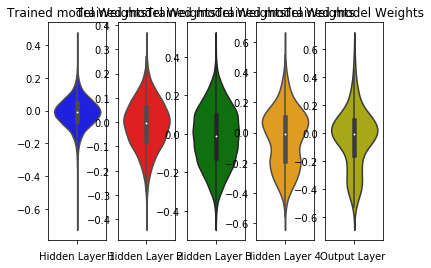

In [78]:
w_after = models['784-512-128-64-32-16-10'].get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[6].flatten().reshape(-1,1)
h3_w = w_after[12].flatten().reshape(-1,1)
h4_w = w_after[18].flatten().reshape(-1,1)
out_w = w_after[24].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 5, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 5, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 5, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 5, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='orange')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 5, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**Having 5 hidden layers decreased our accuracy a lot (least accuracy by far). the loss seems to be stagnating and not reducing much after some epochs. having less number of layers seems to be best as our problem is not complex enough to do deeper networks. Taking 2-hidden layers and trying to increase the accuracy of our model.**

### Model with 2 hidden layers. Architecture: 784-512-256-10 with more epochs

In [0]:
nb_epoch = 50

In [0]:
import warnings
warnings.filterwarnings('ignore')

model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=initializers.he_normal(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(256, activation='relu', kernel_initializer=initializers.he_normal(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

models['784-512-256-10_50'] = model_relu
histories['784-512-256-10_50'] = history

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 7s 121us/step - loss: 0.4028 - acc: 0.8785 - val_loss: 0.1324 - val_acc: 0.9589
Epoch 2/50
60000/60000 [==============================] - 5s 86us/step - loss: 0.1933 - acc: 0.9410 - val_loss: 0.1044 - val_acc: 0.9679
Epoch 3/50
60000/60000 [==============================] - 5s 89us/step - loss: 0.1490 - acc: 0.9535 - val_loss: 0.0875 - val_acc: 0.9726
Epoch 4/50
60000/60000 [==============================] - 5s 88us/step - loss: 0.1281 - acc: 0.9610 - val_loss: 0.0757 - val_acc: 0.9756
Epoch 5/50
60000/60000 [==============================] - 5s 86us/step - loss: 0.1116 - acc: 0.9649 - val_loss: 0.0733 - val_acc: 0.9763
Epoch 6/50
60000/60000 [==============================] - 5s 87us/step - loss: 0.1004 - acc: 0.9688 - val_loss: 0.0741 - val_acc: 0.9765
Epoch 7/50
60000/60000 [==============================] - 5s 88us/step - loss: 0.0968 - acc: 0.9699 - val_loss: 0.0648 - val_ac

Test score: 0.04899904340120793
Test accuracy: 0.9858


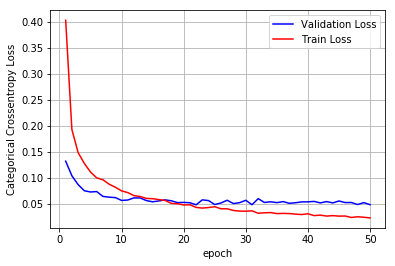

In [0]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

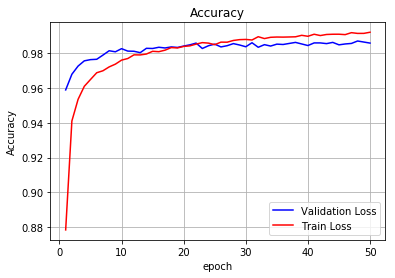

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Accuracy')
ax.set_title('Accuracy')

x = list(range(1,nb_epoch+1))

vy = history.history['val_acc']
ty = history.history['acc']
plt_dynamic(x, vy, ty, ax)

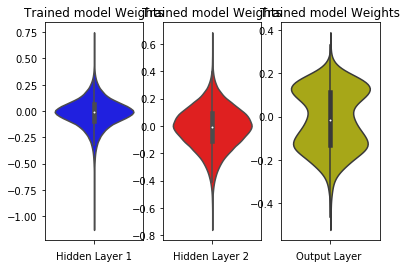

In [81]:
w_after = models['784-512-256-10_50'].get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[6].flatten().reshape(-1,1)
out_w = w_after[12].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**This model gives slightly more accuracy. The model's validation accuracy is not increasing much from epoch 30 but Train accuracy is increasing which might indicate overfitting. So this model architecture's best accuracy seems to be around 98.58 %. Now we try for 3 hidden layers.**

### Model with 3 hidden layers. Architecture: 784-512-256-128-10 with more epochs

In [0]:
import warnings
warnings.filterwarnings('ignore')

model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=initializers.he_normal(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(256, activation='relu', kernel_initializer=initializers.he_normal(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(128, activation='relu', kernel_initializer=initializers.he_normal(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

models['784-512-256-128-10_50'] = model_relu
histories['784-512-256-128-10_50'] = history

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 9s 154us/step - loss: 0.5805 - acc: 0.8245 - val_loss: 0.1593 - val_acc: 0.9519
Epoch 2/50
60000/60000 [==============================] - 7s 114us/step - loss: 0.2457 - acc: 0.9274 - val_loss: 0.1116 - val_acc: 0.9651
Epoch 3/50
60000/60000 [==============================] - 7s 114us/step - loss: 0.1938 - acc: 0.9415 - val_loss: 0.0982 - val_acc: 0.9687
Epoch 4/50
60000/60000 [==============================] - 7s 116us/step - loss: 0.1657 - acc: 0.9516 - val_loss: 0.0865 - val_acc: 0.9733
Epoch 5/50
60000/60000 [==============================] - 7s 114us/step - loss: 0.1412 - acc: 0.9580 - val_loss: 0.0807 - val_acc: 0.9752
Epoch 6/50
60000/60000 [==============================] - 7s 113us/step - loss: 0.1299 - acc: 0.9616 - val_loss: 0.0776 - val_acc: 0.9766
Epoch 7/50
60000/60000 [==============================] - 7s 114us/step - loss: 0.1179 - acc: 0.9653 - val_loss: 0.0733 - 

Test score: 0.058391568849549366
Test accuracy: 0.9861


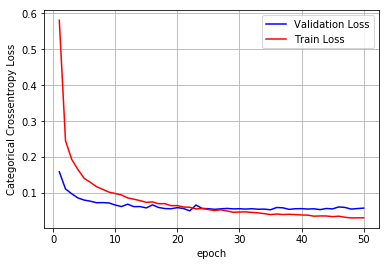

In [0]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

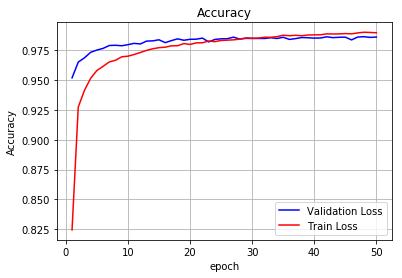

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Accuracy')
ax.set_title('Accuracy')

x = list(range(1,nb_epoch+1))

vy = history.history['val_acc']
ty = history.history['acc']
plt_dynamic(x, vy, ty, ax)

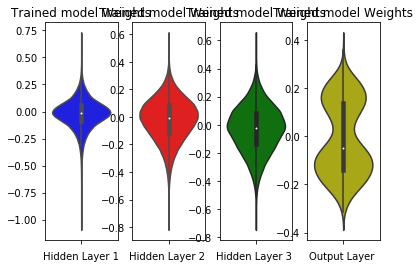

In [80]:
w_after = models['784-512-256-128-10_50'].get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[6].flatten().reshape(-1,1)
h3_w = w_after[12].flatten().reshape(-1,1)
out_w = w_after[18].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**This model did give good accuracy and loss. But let us take models with 2 hidden layers and do some hyper-parameter tuning on those models to get optimal parameters. Not taking 3 hidden layers as tuning becomes difficult**

**All the weight distributions pretty much look same for all plots (Except for 5 hidden layers model). All weights of hidden layers are distributed around 0 and are similar to normally distributed except for last output layer.**<br/>
**This is my analogy of ditributions of weights in output layer. The distribution have two peaks one with negative values and one with positive values. As the output layer has softmax activation and all our outputs are vectors with one 1 and remaining zeros (ex: [0, 1, 0, 0, 0, ...]). The weights have to be such that the values of X.W should have some negative values so the e^(X.W) is less value and some weights should be positive so e^(X.W) is high to get a single confident value in the ouputs.**<br/><br/>
**But in one of comments mentioned that weights of output layer are distributed around 1 after Batch normalization. Plotting weights of BN to make sure if any of them are mis-interpreted as output layer weights.**

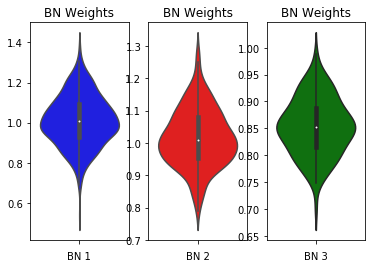

In [83]:
w_after = models['784-512-256-128-10_50'].get_weights()

h1_w = w_after[2].flatten().reshape(-1,1)
h2_w = w_after[8].flatten().reshape(-1,1)
h3_w = w_after[14].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weigths after training")
plt.subplot(1, 3, 1)
plt.title("BN Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('BN 1')

plt.subplot(1, 3, 2)
plt.title("BN Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('BN 2')

plt.subplot(1, 3, 3)
plt.title("BN Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('BN 3')
plt.show()

**So Batch normalization weights are distributed around 1 and hidden layer weights are distributed around 0 which makes sense as our hidden layer weights are initially distributed as gaussian. And Weights for batch normalization are used to scale the input data and add some bias to them. As the weights indicate scaling they are distributed around 1.**

## Hyper-parameter tuning with hyperas

**After hyper-parameter tuning section we compare models without batch normalization and without dropout and also changing other parameters like optimizer, activation function etc..**

**The below code is taken from the blog written by Shashank Ramesh**<br/>
URL: https://towardsdatascience.com/a-guide-to-an-efficient-way-to-build-neural-network-architectures-part-i-hyper-parameter-8129009f131b

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
!pip install hyperas

from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform

In [0]:
def data():
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=12345)
    X_train = X_train.reshape(48000, 784)
    X_val = X_val.reshape(12000, 784)
    X_train = X_train.astype('float32')
    X_val = X_val.astype('float32')
    X_train /= 255
    X_val /= 255
    nb_classes = 10
    Y_train = np_utils.to_categorical(y_train, nb_classes)
    Y_val = np_utils.to_categorical(y_val, nb_classes)
    return X_train, Y_train, X_val, Y_val

**Only tuning the required parameters which are number of nuerons in hidden layers, Dropout rate, learning rate of Adam and batch size for training. Not tuning activation functions and optimizers as 'Relu' and 'Adam' are better choices than others.**

In [0]:
def model(X_train, Y_train, X_val, Y_val):
    
    model = Sequential()
    model.add(Dense({{choice([128, 256, 512])}}, input_shape=(784,)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout({{uniform(0, 1)}}))
    model.add(Dense({{choice([128, 256, 512])}}))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout({{uniform(0, 1)}}))
        
    model.add(Dense(10))
    model.add(Activation('softmax'))
    optim = keras.optimizers.Adam(lr={{choice([10**-3, 10**-2, 10**-1])}})
    
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optim)
    model.fit(X_train, Y_train,
              batch_size={{choice([128,256,512])}},
              nb_epoch=35,
              verbose=2,
              validation_data=(X_val, Y_val))
    score, acc = model.evaluate(X_val, Y_val, verbose=0)
    print('Test accuracy:', acc)
    return {'loss': -acc, 'status': STATUS_OK, 'model': model}

**Before running the hyper-parameter tuning using hyperas, As I am using google colab I need to save the notebook into drive so that hyperas locates it correctly. Code took from blog written by Nils Schlüter**<br/>
URL: https://towardsdatascience.com/keras-hyperparameter-tuning-in-google-colab-using-hyperas-624fa4bbf673

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Copy/download the file
fid = drive.ListFile({'q':"title='Keras_Mnist_ilmnarayana.ipynb'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('Keras_Mnist_ilmnarayana.ipynb')

In [0]:
import keras

In [0]:
X_train, Y_train, X_val, Y_val = data()
best_run, best_model = optim.minimize(model=model,
                                      data=data,
                                      algo=tpe.suggest,
                                      max_evals=35,
                                      trials=Trials(),
                                      notebook_name='Keras_Mnist_ilmnarayana')

>>> Imports:
#coding=utf-8

try:
    from keras.utils import np_utils
except:
    pass

try:
    from keras.datasets import mnist
except:
    pass

try:
    import seaborn as sns
except:
    pass

try:
    from keras.initializers import RandomNormal
except:
    pass

try:
    import matplotlib.pyplot as plt
except:
    pass

try:
    import numpy as np
except:
    pass

try:
    import time
except:
    pass

try:
    from keras.models import Sequential
except:
    pass

try:
    from keras.layers import Dense, Activation
except:
    pass

try:
    from keras import initializers
except:
    pass

try:
    from keras.layers.normalization import BatchNormalization
except:
    pass

try:
    from keras.layers import Dropout
except:
    pass

try:
    import warnings
except:
    pass

try:
    import warnings
except:
    pass

try:
    import warnings
except:
    pass

try:
    import warnings
except:
    pass

try:
    import warnings
except:
    pass

try:
    import warnings
except:
    

W0906 15:21:57.608505 140561456478080 nn_ops.py:4224] Large dropout rate: 0.73717 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


Train on 48000 samples, validate on 12000 samples
Epoch 1/35
 - 4s - loss: 0.9418 - acc: 0.7367 - val_loss: 0.3422 - val_acc: 0.9048

Epoch 2/35
 - 2s - loss: 0.5965 - acc: 0.8279 - val_loss: 0.3433 - val_acc: 0.9158

Epoch 3/35
 - 2s - loss: 0.5549 - acc: 0.8482 - val_loss: 0.2607 - val_acc: 0.9332

Epoch 4/35
 - 2s - loss: 0.5426 - acc: 0.8589 - val_loss: 0.2639 - val_acc: 0.9383

Epoch 5/35
 - 2s - loss: 0.5178 - acc: 0.8660 - val_loss: 0.2984 - val_acc: 0.9369

Epoch 6/35
 - 2s - loss: 0.5501 - acc: 0.8656 - val_loss: 0.2559 - val_acc: 0.9437

Epoch 7/35
 - 2s - loss: 0.5089 - acc: 0.8737 - val_loss: 0.2528 - val_acc: 0.9447

Epoch 8/35
 - 2s - loss: 0.5170 - acc: 0.8764 - val_loss: 0.2462 - val_acc: 0.9398

Epoch 9/35
 - 2s - loss: 0.4876 - acc: 0.8781 - val_loss: 0.2366 - val_acc: 0.9478

Epoch 10/35
 - 2s - loss: 0.5063 - acc: 0.8810 - val_loss: 0.2747 - val_acc: 0.9486

Epoch 11/35
 - 2s - loss: 0.5555 - acc: 0.8778 - val_loss: 0.2440 - val_acc: 0.9522

Epoch 12/35
 - 2s - loss

In [0]:
print(best_run)
print(best_model)

{'Dense': 2, 'Dense_1': 2, 'Dropout': 0.6518168887306186, 'Dropout_1': 0.10031134525043753, 'batch_size': 2, 'lr': 0}


**Activation and optimizer are not tuned as they are taken as 'Relu' and 'Adam' respectively which are good enough for performance of the models. Below is the best model after hyper-parameter tuning which is trained on 50 epochs to see the accuracy.**

In [0]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=initializers.he_normal(seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.652))
model.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=initializers.he_normal(seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(output_dim, activation='softmax'))

optim = keras.optimizers.Adam(lr=10**-3)

model.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=128, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

score, acc = model.evaluate(X_test, Y_test, verbose=0)

models['784-512-512-10_50'] = model
histories['784-512-512-10_50'] = history

print('Test accuracy:', acc)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 8s 135us/step - loss: 0.3453 - acc: 0.8945 - val_loss: 0.1337 - val_acc: 0.9588
Epoch 2/50
60000/60000 [==============================] - 6s 96us/step - loss: 0.1900 - acc: 0.9413 - val_loss: 0.0947 - val_acc: 0.9693
Epoch 3/50
60000/60000 [==============================] - 6s 94us/step - loss: 0.1511 - acc: 0.9534 - val_loss: 0.0826 - val_acc: 0.9742
Epoch 4/50
60000/60000 [==============================] - 6s 96us/step - loss: 0.1326 - acc: 0.9582 - val_loss: 0.0758 - val_acc: 0.9775
Epoch 5/50
60000/60000 [==============================] - 6s 93us/step - loss: 0.1191 - acc: 0.9625 - val_loss: 0.0681 - val_acc: 0.9785
Epoch 6/50
60000/60000 [==============================] - 6s 94us/step - loss: 0.1076 - acc: 0.9664 - val_loss: 0.0678 - val_acc: 0.9786
Epoch 7/50
60000/60000 [==============================] - 6s 94us/step - loss: 0.1028 - acc: 0.9675 - val_loss: 0.0680 - val_ac

Test score: 0.05098860060831175
Test accuracy: 0.9861


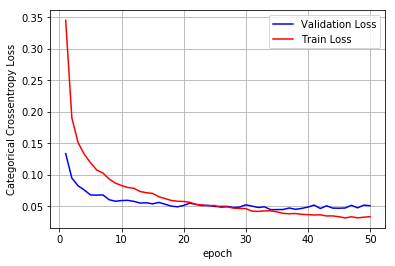

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

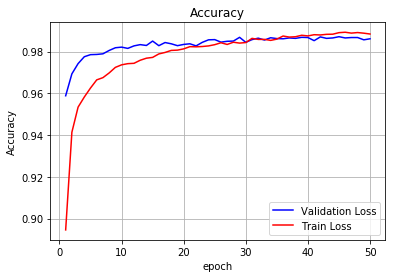

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Accuracy')
ax.set_title('Accuracy')

x = list(range(1,nb_epoch+1))

vy = history.history['val_acc']
ty = history.history['acc']
plt_dynamic(x, vy, ty, ax)

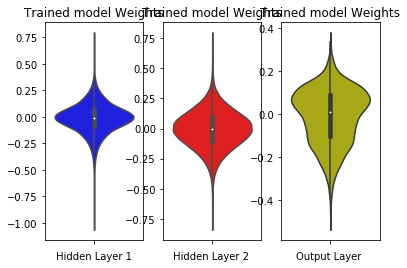

In [82]:
w_after = models['784-512-512-10_50'].get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[6].flatten().reshape(-1,1)
out_w = w_after[12].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**This model is best so far with 98.61% accuracy and 0.051 loss. Let us print some mis-classified images to see where it went wrong.**

In [0]:
y_pred = model.predict(X_test)
print(len(y_pred))

10000


In [0]:
ind_arr = np.array(list(range(10000)))
miss_ind = [np.argmax(y_pred[i]) != y_test[i] for i in range(10000)]
ind_arr = ind_arr[miss_ind]

**Titles of each image has its predicted values.**

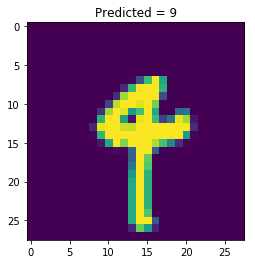

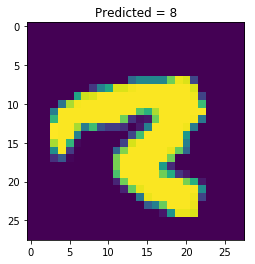

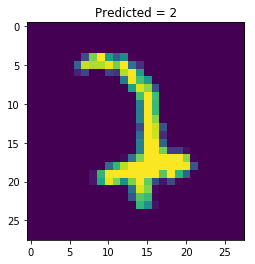

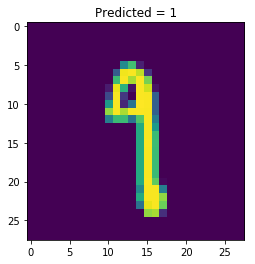

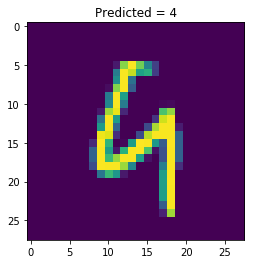

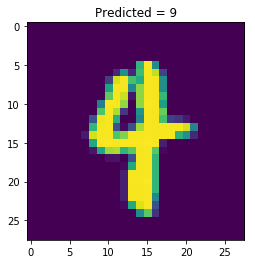

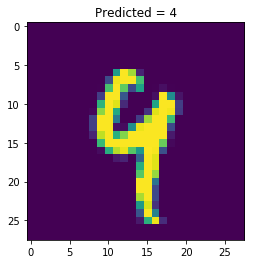

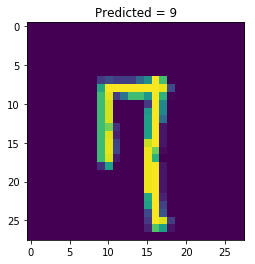

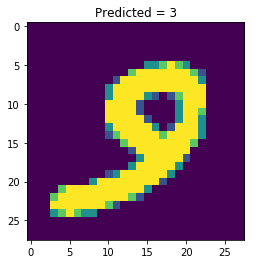

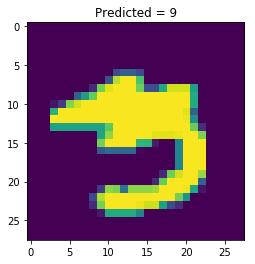

In [0]:
import random
for _ in range(10):
  ind = random.choice(ind_arr)
  plt.imshow((X_test[ind].reshape(28, 28))*255)
  plt.title(f"Predicted = {np.argmax(y_pred[ind])}")
  plt.show()

**Other models wrong predictions.**

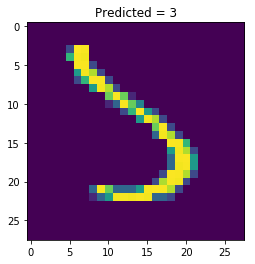

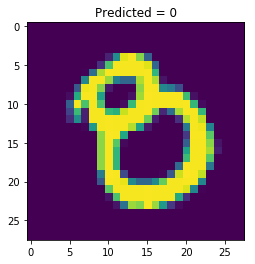

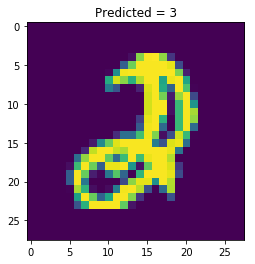

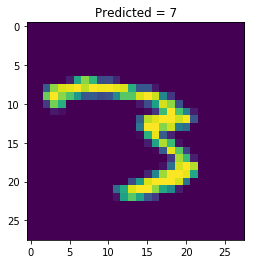

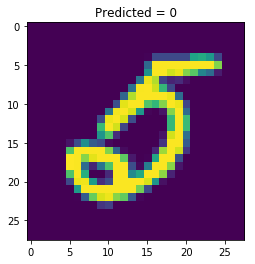

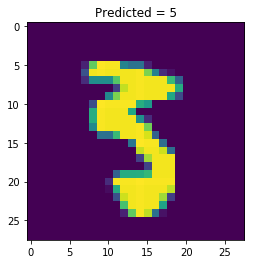

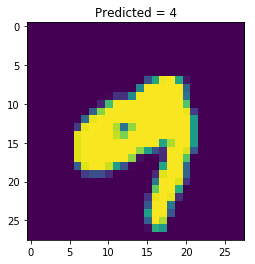

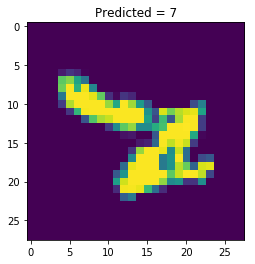

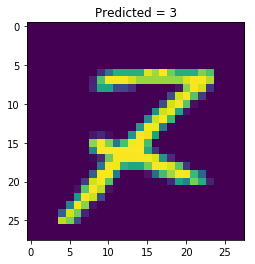

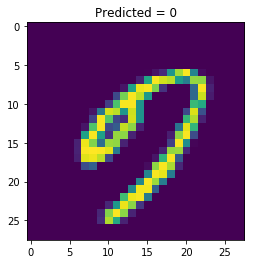

In [0]:
import random
for _ in range(10):
  ind = random.choice(ind_arr)
  plt.imshow((X_test[ind].reshape(28, 28))*255)
  plt.title(f"Predicted = {np.argmax(y_pred[ind])}")
  plt.show()

## Testing other models with no batch normalization and no dropout and changing other parameters like activation functions and optimizers

**Taking 784-512-256-10 as the model and continuing to experiment on it with No Batch normalizaions and Dropouts. Below are the results of main model which have BN and Dropouts and we see the difference between this model and coming models (All are trained on 20 epochs).**<br/><br/>
**Test score: 0.053256970743143756<br/>
Test accuracy: 0.9844**
<br/><br/>
**And Weight distributions of 784-512-256-10 (previously trained) are plotted below again for reference.**

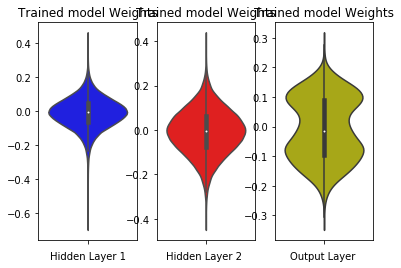

In [85]:
w_after = models['784-512-256-10'].get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[6].flatten().reshape(-1,1)
out_w = w_after[12].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### Without Batch Normalization

In [0]:
nb_batch = 20

In [0]:
import warnings
warnings.filterwarnings('ignore')

model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=initializers.he_normal(seed=None)))
model_relu.add(Dropout(0.5))
model_relu.add(Dense(256, activation='relu', kernel_initializer=initializers.he_normal(seed=None)))
model_relu.add(Dropout(0.5))
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=0, validation_data=(X_test, Y_test))

models['784-512-256-10_NOBN'] = model_relu
histories['784-512-256-10_NOBN'] = history

Test score: 0.061633928584580645
Test accuracy: 0.9841


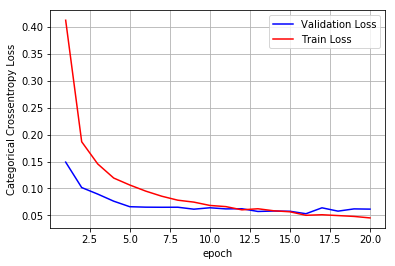

In [105]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

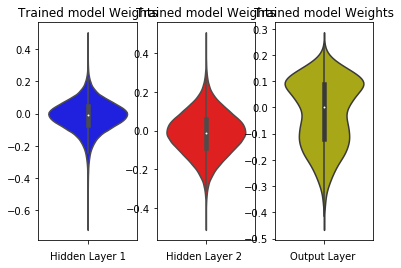

In [117]:
w_after = models['784-512-256-10_NOBN'].get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**After removing Batch normalization accuracy is slightly less than the main model and loss is also slightly more. Weight distribution looks almost similar for hidden layers but for output layer there seems to be more positive weights than the main model.**

### Without Dropouts

In [0]:
import warnings
warnings.filterwarnings('ignore')

model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=initializers.he_normal(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dense(256, activation='relu', kernel_initializer=initializers.he_normal(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=0, validation_data=(X_test, Y_test))

models['784-512-256-10_NODR'] = model_relu
histories['784-512-256-10_NODR'] = history

Test score: 0.08391701467761513
Test accuracy: 0.9813


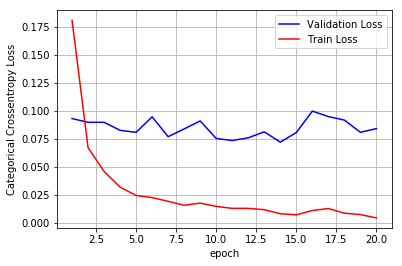

In [91]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

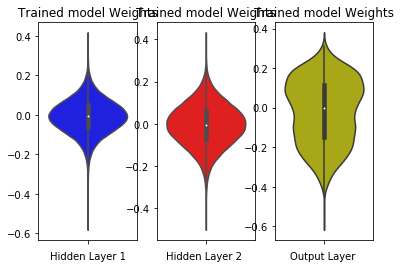

In [126]:
w_after = models['784-512-256-10_NODR'].get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[6].flatten().reshape(-1,1)
out_w = w_after[12].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**After removing dropouts we can see a lot of difference between the results. Loss is very high and accuracy seems to be fine. But train loss is so less (neary 0.01) this indicates that our model is overfitting a lot and the loss of test is also fluctualting a lot showing that there are no improvements in testing accuracy as it is overfitted on training set. weight distributions are almost same except for output layer which again seems to have lot of positive values.**

### Activation -> Sigmoid

In [0]:
import warnings
warnings.filterwarnings('ignore')

model_relu = Sequential()
model_relu.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=initializers.he_normal(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(256, activation='sigmoid', kernel_initializer=initializers.he_normal(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=0, validation_data=(X_test, Y_test))

models['784-512-256-10_sigmoid'] = model_relu
histories['784-512-256-10_sigmoid'] = history

Test score: 0.06232662117220461
Test accuracy: 0.9814


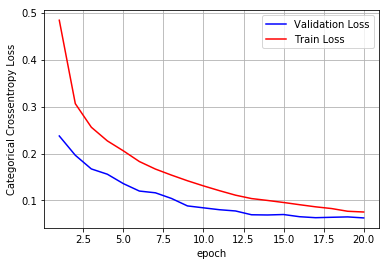

In [94]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

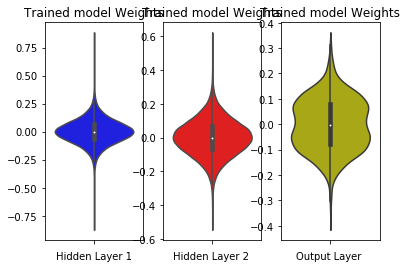

In [119]:
w_after = models['784-512-256-10_sigmoid'].get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[6].flatten().reshape(-1,1)
out_w = w_after[12].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**Changing activation functions of 2 hidden layers to `sigmoid` decreased our accuracy and increased our loss as well. So Relu did good than sigmoid even when we dont have very deep network. The weights distributions are almost same and the weights of output layer are nearer to zero in this model.**

### Optimizer -> AdaDelta

**Choosing AdaDelta as this optimizer is good when we have sparse data (we have lot of pixels of value 0 in our pictures).**

In [0]:
import warnings
warnings.filterwarnings('ignore')

model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=initializers.he_normal(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(256, activation='relu', kernel_initializer=initializers.he_normal(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=0, validation_data=(X_test, Y_test))

models['784-512-256-10_adadelta'] = model_relu
histories['784-512-256-10_adadelta'] = history

Test score: 0.05676332595801214
Test accuracy: 0.9846


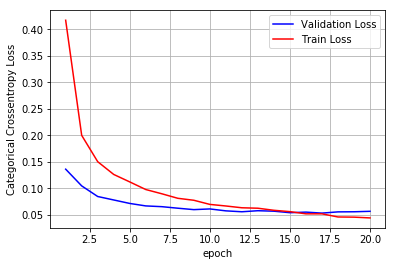

In [97]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

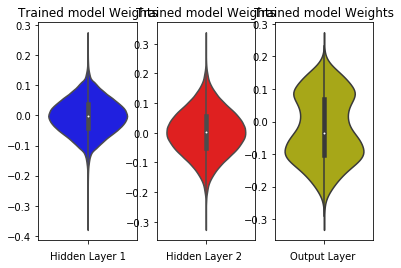

In [120]:
w_after = models['784-512-256-10_adadelta'].get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[6].flatten().reshape(-1,1)
out_w = w_after[12].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**Choosing AdaDelta as our optimizer actually increased our accuracy and also decreased our loss slightly. I think this is due to the reason that agadelta is good with sparse data and we have 0's in our input. the weight distributions are same as the main model which indicates changing our optimizer to another good optimiser didnt change the model much. So let us see for a 'not so good' optimiser so that we can see some difference.**

### Optimizer -> SGD

In [0]:
import warnings
warnings.filterwarnings('ignore')

model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=initializers.he_normal(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(256, activation='relu', kernel_initializer=initializers.he_normal(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=0, validation_data=(X_test, Y_test))

models['784-512-256-10_sgd'] = model_relu
histories['784-512-256-10_sgd'] = history

Test score: 0.10426200004285202
Test accuracy: 0.9688


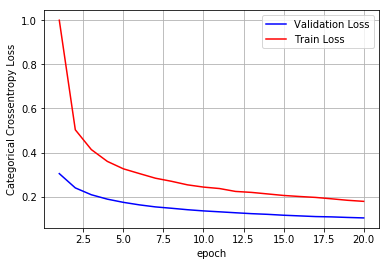

In [110]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

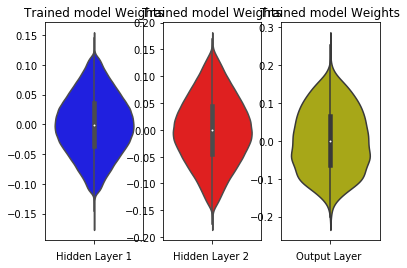

In [121]:
w_after = models['784-512-256-10_sgd'].get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[6].flatten().reshape(-1,1)
out_w = w_after[12].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**Changing optimisers to SGD is very bad decision as we can see a lot of difference in the models performance and weight distributions. We have least accuracy so far and highest loss so far. And weight distributions are different from the main model and didnt seem to change much from the initializations that are done before training as the output layers weights are not at all same as that of previous models.**

### Initializers -> Glorot_Normal

In [0]:
import warnings
warnings.filterwarnings('ignore')

model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=initializers.glorot_normal(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(256, activation='relu', kernel_initializer=initializers.glorot_normal(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=0, validation_data=(X_test, Y_test))

models['784-512-256-10_glorot'] = model_relu
histories['784-512-256-10_glorot'] = history

Test score: 0.054689733804622664
Test accuracy: 0.9842


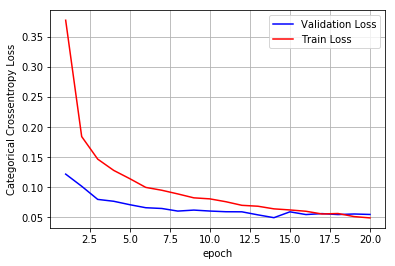

In [101]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

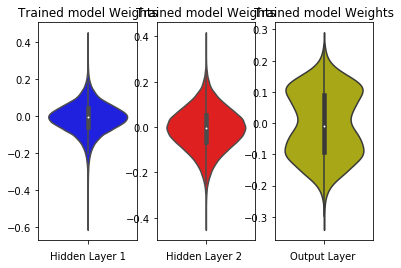

In [122]:
w_after = models['784-512-256-10_glorot'].get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[6].flatten().reshape(-1,1)
out_w = w_after[12].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**Changing initializations to Glorot normal didnt change results much. accuracy and loss are almost same and weight distributions are also almost same.**

### Initializers -> Random Uniform (-0.5, 0.5)

In [0]:
import warnings
warnings.filterwarnings('ignore')

model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=initializers.RandomUniform(minval=-0.5, maxval=0.5, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(256, activation='relu', kernel_initializer=initializers.RandomUniform(minval=-0.5, maxval=0.5, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=0, validation_data=(X_test, Y_test))

models['784-512-256-10_uniform'] = model_relu
histories['784-512-256-10_uniform'] = history

Test score: 0.05820857608325896
Test accuracy: 0.9819


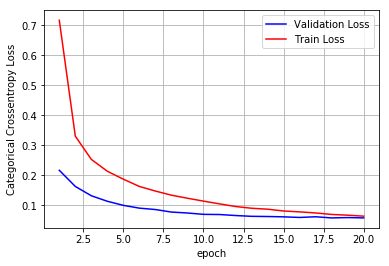

In [115]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

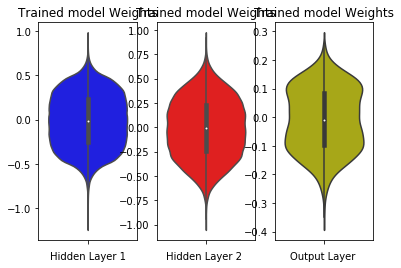

In [123]:
w_after = models['784-512-256-10_uniform'].get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[6].flatten().reshape(-1,1)
out_w = w_after[12].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**Changing initalisations to uniform reduced the accuracy and increased loss. And weight distributions are more flattened than previous models as they are initialised to uniform.**

## Conclusion:

In [2]:
from prettytable import PrettyTable

In [3]:
table = PrettyTable()
table.field_names = ['Architecture', 'No of hidden layers', 'epochs', 'Cross-entropy Loss', 'Test Accuracy']
table.add_row(['784-512-128-10', 2, 20, 0.05295, '98.51%'])
table.add_row(['784-256-128-10', 2, 20, 0.063, '98.11%'])
table.add_row(['784-512-256-10', 2, 20, 0.05326, '98.44%'])
table.add_row(['784-512-256-128-10', 3, 20, 0.06344, '98.26%'])
table.add_row(['784-512-128-64-32-16-10', 5, 20, 0.104, '97.83%'])
table.add_row(['784-512-256-10', 2, 50, 0.049, '98.58%'])
table.add_row(['784-512-256-128-10', 3, 50, 0.05839, '98.61%'])
table.add_row(['784-512-512-10 Dropout: 0.652-0.1', 2, 50, 0.051, '98.61%'])
table.add_row(['784-512-256-10 No BN', 2, 20, 0.06163, '98.41%'])
table.add_row(['784-512-256-10 No Dropout', 2, 20, 0.08392, '98.13%'])
table.add_row(['784-512-256-10 sigmoid', 2, 20, 0.06233, '98.14%'])
table.add_row(['784-512-256-10 AdaDelta', 2, 20, 0.05676, '98.46%'])
table.add_row(['784-512-256-10 SGD', 2, 20, 0.10426, '96.88%'])
table.add_row(['784-512-256-10 Glorot', 2, 20, 0.05469, '98.42%'])
table.add_row(['784-512-256-10 Uniform', 2, 20, 0.05821, '98.19%'])

print(table)

+-----------------------------------+---------------------+--------+--------------------+---------------+
|            Architecture           | No of hidden layers | epochs | Cross-entropy Loss | Test Accuracy |
+-----------------------------------+---------------------+--------+--------------------+---------------+
|           784-512-128-10          |          2          |   20   |      0.05295       |     98.51%    |
|           784-256-128-10          |          2          |   20   |       0.063        |     98.11%    |
|           784-512-256-10          |          2          |   20   |      0.05326       |     98.44%    |
|         784-512-256-128-10        |          3          |   20   |      0.06344       |     98.26%    |
|      784-512-128-64-32-16-10      |          5          |   20   |       0.104        |     97.83%    |
|           784-512-256-10          |          2          |   50   |       0.049        |     98.58%    |
|         784-512-256-128-10        |         

**Model with dropout values is obtained by tuning hyper-parameters. models with no extra info have Batch normalization and Dropout layers to them and they have Relu as activation function and Adam as optimizer and weights initialized to He_normal. In above table these values are default for all models except for those it is mentioned**

**Conclusion:**
- **Increase in number of hidden layers didnt increase our accuracies and infact MLP with 5 hidden layers has least accuracy and highest loss.**
- **MLP with 3 hidden layers also didnt give good results as the losses of the models are little high.**
- **The best model with good accuracy and good loss is (784-512-512-10 Dropout: 0.652-0.1) which is obtained by hyper-paramter tuning. Even though MLP with 3 hidden layers (784-512-256-128-10) and 50 epochs gave good accuracy the loss is not that good.**
- **More hyper-parameter tuning might give even better models but accuracy may not be as high as 99% with simple MLPs because lot of model's accuracy is not increasing after certain number of epochs (99% might be achieved by CNN's). This may be due to the reason that images are not good (i.e. have bad handwriting). From above mis-predicted images we can see that mis-predictions have some reasons behind it (i.e. we can see 7 predicted as 3 as there is line in between and 9 predicted as 4 as the image look similar to 4 etc). And even we cant classify few images for example, one of the images (predicted as 3) shown above is not predictable just by looking at image.**
- **The model with optimizer as AdaDelta also seems to give good results. So in furthur hyper-parameter tuning we can consider it as a option. This may be due to the reason that inputs we have are slightly sparse.**
- **Other than optimizer remianing changes didnt give good results than our choices. Which is good.**
- **Removing Batch normalization didnt change the weight distribution much (which I expected to change). The weight distributions of hidden layers are almost normally distributed around 0 in all cases and weight distributions of output layer are also same for almost every model except for some models. Output layer distributions have 2 peaks - one in positive side of zero and other in negative side which i guess due to the activation function softmax.**
- **Distribution of Batch normalization weights are distributed around 1. which I believe they should be as these are scale values that will be multiplied to the results of previous layer.**